In [111]:
import numpy as np
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import csv

In [112]:
#this function converts name to a feature vector 
def convert_name(name):
    arr = np.zeros(26*26+1513)
    #26*26 all possiable 2-grams and 1513 features for last 3 charaters
    name = str(name)
    # Iterate every 2 characters 2gram and caliculate the frequency of the 2gram
    for x in range(len(name)-1):
        ind = (ord(name[x])-ord('a'))*26 + (ord(name[x+1])-ord('a'))
        arr[ind] += 1
    #check last 3 characters and set the value to 1 if the last 3 character key is found in the features dictionary for that index 
    if name[-3:] in my_features.keys():
        ind = my_features[name[-3:]]+676
        arr[ind]=1
        
    # check if Last character is vowel
    if (name[-1]=='a' or name[-1]=='e' or name[-1]=='i' or name[-1]=='o' or name[-1]=='u' or name[-1]=='y'):
        arr[-1] = 1
    else:
        arr[-1] = 0
    return arr

In [113]:
#load data
my_data = np.genfromtxt('data/gender.csv', 
                        delimiter=',', 
                        dtype=[('name','<U16'), ('gender','<U8'),('count','i4')],
                        converters={0: lambda s:s.lower()})
my_data = np.array([row for row in my_data])

#load most common last 3 character for india names create a features dictionary
features_reader = csv.reader(open('data/features.csv', 'r'))
my_features = {}
for row in features_reader:
   k, v = row
   my_features[k] = int(v)


In [114]:
name_map = np.vectorize(convert_name, otypes=[np.ndarray])
Xlist = name_map(my_data['name'])
X = np.array(Xlist.tolist())
y = my_data['gender']

In [115]:
for x in range(5):
    Xtr, Xte, ytr, yte = train_test_split(X, y, test_size=0.33)
    clf = RandomForestClassifier(n_estimators=100, min_samples_split=2)
    clf.fit(Xtr, ytr)
    print(np.mean(clf.predict(Xte) == yte))

0.816666666667
0.816388888889
0.808055555556
0.824444444444
0.812777777778


Feature ranking:
1. feature 2188 (0.149807)
2. feature 182 (0.011254)
3. feature 13 (0.010982)
4. feature 442 (0.010012)
5. feature 338 (0.009405)
6. feature 714 (0.009214)
7. feature 346 (0.008889)
8. feature 475 (0.008582)
9. feature 312 (0.008490)
10. feature 502 (0.008374)


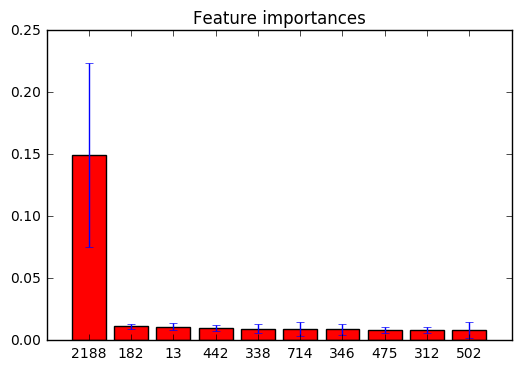

In [98]:
#check important features
clf.feature_importances_
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
indices = indices[:10]
# Print the feature ranking
print("Feature ranking:")

for f in range(10):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

import matplotlib.pyplot as plt
plt.figure()
plt.title("Feature importances")
plt.bar(range(10), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(10), indices)
plt.xlim([-1, 10])
plt.show()

In [99]:
idx = np.random.choice(np.arange(len(Xlist)), 10, replace=False)
xs = my_data['name'][idx]
ys = y[idx]
pred = clf.predict(X[idx])
for a,b, p in zip(xs,ys, pred):
     print(a,b,p)

sharmale M M
kshaunish M M
mubshshira F F
kuso F F
devesh M M
aisha F F
sagitaharsita F F
prabhu M M
jugender M M
heman M M


In [110]:
#give some name not present in test/training data (manual check)
xreal = name_map(['virinchi','samanvi','ashrith','saikeerthi','seol','vistista','kranthi','anveesh'])
Xreal_conveted = np.array(xreal.tolist())
pred = clf.predict(Xreal_conveted)
pred

array(['F', 'F', 'M', 'F', 'M', 'F', 'F', 'M'], 
      dtype='<U8')